# Bayesian Statistics

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


$\newcommand{\Lik}{p(D \vert \theta)}$

## Contents
{:.no_toc}
* 
{: toc}

## Frequentist Statistics

In frequentist approach, a parameter estimate is computed by using some function on the data $D$. 
In the world of frequentist there is a true value of the parameter, which is fixed, however  the data are random. 

In other words, assuming that a given distribution is a good description of the model, there is a true parameter $\theta^{\star}$ that characterizes the population. Given the data set(sample) we have, we can estimate the parameter $\hat{\theta}$. If we could replicate the experiment many times we would have the sampling distribution of $\theta$ which can be used to estimate the error on the parameter estimation. By sampling $M$ Data sets $D_i$, each of size $N$, from some true model characterized by $\theta^{\star}$ we are able to calculate  $\hat{\theta}_i$, one for each dataset. This is the sampling distribution.  

### Maximum Likelihood
A  basic approach to parameter estimation is maximum likelihood (MLE). The goal here
is to find the parameter estimates that maximize the likelihood. 

The likelihood gives us a measure of how likely it is to observe values $D={d_1,...,d_n}$ given the parameters $\theta$. 

Assumming iid, the likelihood  is

$$L=\Lik = \prod_{i=1}^{n} p(d_i \vert \theta)$$

How likely are the observations if the model is true?

This corresponds to maximizing the likelihood as a function of $\theta$ for a given set of observations. 

$$ \theta_{ML} = \arg \! \max_{\theta} \Lik $$

Notice that this method wants to account for every point in the "training set". So it overfits.

## The Bayesian Approach

In its essence, the Bayesian approach has two parts.

(A) treat $\theta$ as a random variable instead, and to fix the data set. So we dont talk anymore about the data set as a sample from a population, but assume that its all we know about the world. 

(b) Associate with the parameter $\theta$ a prior distribution $p(\theta)$. 

The prior distribution *generally* represents our belief on the
parameter values when we have not observed any data yet.  (I use the wiggle word generally as we might estimate this prior itself from data. This is a useful idea, although philosophically-bayesian purists will frown on it)

### Posterior Distribution

In a Bayesian context, the first
goal is to estimate the posterior distribution over parameter values given our data. This is also
known as posterior inference. In other words, we would like to know $p(\theta \vert D)$ or $p(\theta \vert y)$.

$$ p(\theta \vert y) = \frac{p(y \vert \theta)\,p(\theta)}{p(y)} $$

with the evidence $p(D)$ or $p(y)$ being given by the average of the likelihood (on existing data points) over the prior $E_{p(\theta)}[\cal{L}]$:

$$p(y) = \int d\theta p(y \vert \theta) p(\theta).$$ 

The evidence is basically the normalization constant. But as we have seen, when we sample, we dont usually worry  about the normalization...

You can remember this as:

$$ posterior = \frac{likelihood \times prior}{evidence} $$

This diagram from McElreath's book gives you an idea of what this might look like, and how the prior might affect the posterior in the absence  of copius data...

![](images/priorxlike.png)

What if $\theta$ is multidimensional, as it usually is? Then one can calculate the **marginal posterior** of one of the parameters by integrating over the other one:

$$p(\theta_1 \vert D) = \int d\theta_{-1} p(\theta \vert D).$$

### Posterior Predictive

Remember though at the end of the day, we care about how we are going to make predictions on future data, and not the values of the parameters. Thus what we wish to find is the distribution of a future data point $y^*$, also known as the posterior predictive distribution:

$$p(y^* \vert D=\{y\}) = \int d\theta p(y^* \vert \theta)p(\theta \vert \{y\})$$.

If you like, this is the average of the likelihood at a new point(s)  $E_{p(\theta \vert D)}[p(y \vert \theta)]$.

If you think about this, for example, from the perspective of a regression problem, this is the distribution for y at a new x (which in many cases is gaussian). This is not different from the frequentist case. But there the different y's come from the different samples (typically realized in practice as bootstrap samples).

Where do priors come from? They are engineering assumptions we put in to help our models learn. Usually they have some regularizing effect. There is a branch of philosophy that  takes the attitude that priors can be based on subjective belief. We dont usually do that in the sciences, but as long as you consistently define a probability system, subjective priors are fine to use.

### Maximum a posteriori

The posterior distribution is specified by a simple product of the likelihood (how
likely is the data given the model that uses these parameter estimates) and the prior. 
In Bayesian data analysis, one way to
apply a model to data is to find the maximum a posteriori (MAP) parameter values.
The goal in this case is to find the parameter  that maximize the posterior probability of the
parameters given the data. In other words, we find the mode of the posterior distribution.
This corresponds to:

$$
\begin{eqnarray}
 \theta_{{\rm MAP}} &=& \arg \max_{\theta} \, p(\theta \vert D)  \nonumber \\ 
                               & =& \arg \max_{\theta}  \frac{\Lik \, p(\theta)}{p(D)}  \nonumber \\ 
                               & =& \arg \max_{\theta}  \, \Lik \, p(\theta) \nonumber \\ 
\end{eqnarray}
$$

This looks similar to the maximum likelihood estimation procedure. The difference is that
the prior we set over the parameters does influence the parameter estimation. 

The MAP is an example of a pont-estimate. In general point estimates come from decision risks. For example, the mean comes from a squared-errror risk. The MAP coles from 1-0 loss with equal weghts for all errors. We'll come to this later.

## (Possibly Biased) Coin tosses: Binomial-Beta

code from https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb which you should go read.

The coin toss model allows us to study the binomial likelihood. 

This is our first example of a conjugate prior model. A **conjugate prior** is one which, when multiplied with an appropriate likelihood, gives a posterior with the same functional form as the prior. Likelihoods in the exponential family have conjugate priors in the same family, which makes them very useful. One of the big advantages of this setup is analytical tractability; another is increased interpretability.

Examples include Poisson-Gamma, Binomial-Beta, and Normal-Normal.

Coin tosses are modelled using the Binomial Distribution, which is the distribution of a set of Bernoulli random variables. 

The Beta distribution is conjugate to the Binomial distribution, so that if your prior is
$p \sim Beta(\alpha,\beta)$ and your data distribution is a set of bernoulli trials, so that you have a $L = Binom(n,p)$ likelihood from the multiple ways in which those Bernouuli trials can occur, then your posterior is ALSO a Beta Distribution. So, if we observed y heads in n trials:

$$ p(p \vert y) \propto p(y \vert p) P(p) = Binom(n,y, p) \times Beta(\alpha, \beta)$$

Because of the conjugacy, this turns out to be:

$$Beta(y + \alpha, n - y + \beta)$$

Thus you can think of a prior as a regularizer. In the presence of very little data it gives sensible results from the models. 

Here we use a $Beta(1,1)$ prior since it is equivalent to a uniform distribution. This is an **uninformative prior**. Here the prior adds one heads and one tails to the actual data, providing some "towards-center" regularization to the model. This is especially useful in the situation where in a few tosses you got all heads, clearly at odds with your beliefs.

In [14]:
import scipy.stats as stats
beta = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

In [15]:
def make_data(p, trial_array):
    data = stats.bernoulli.rvs(p, size=trial_array[-1])
    return data

Lets do this for a fair coin. Once we have generated the data with $p=0.5$ lets forget we new that and just see what the data combined with a flat prior gives us.

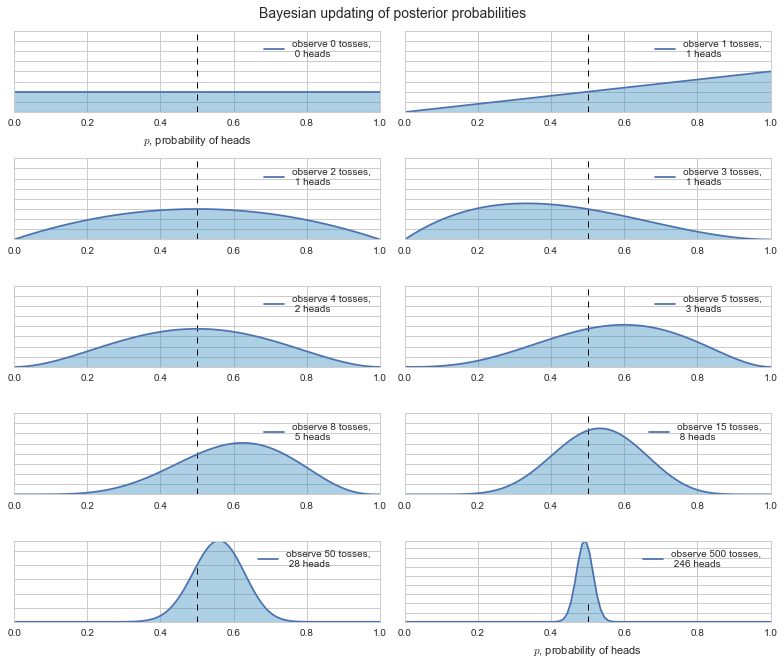

In [16]:
plt.figure(figsize=(11, 9))

p1=0.5
data = make_data(p1, n_trials)
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution.
    y = beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(p1, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### The globe tossing model

And lets do the same for the globe tossing model we talked about at the beginning of class. Briefly, the model was that a seal tosses a globe in the air. When it comes back to her node, she notes down whether the globe came up land or water. We'll assume $p=0.7$ to generate the data. Once again remember to forget that.

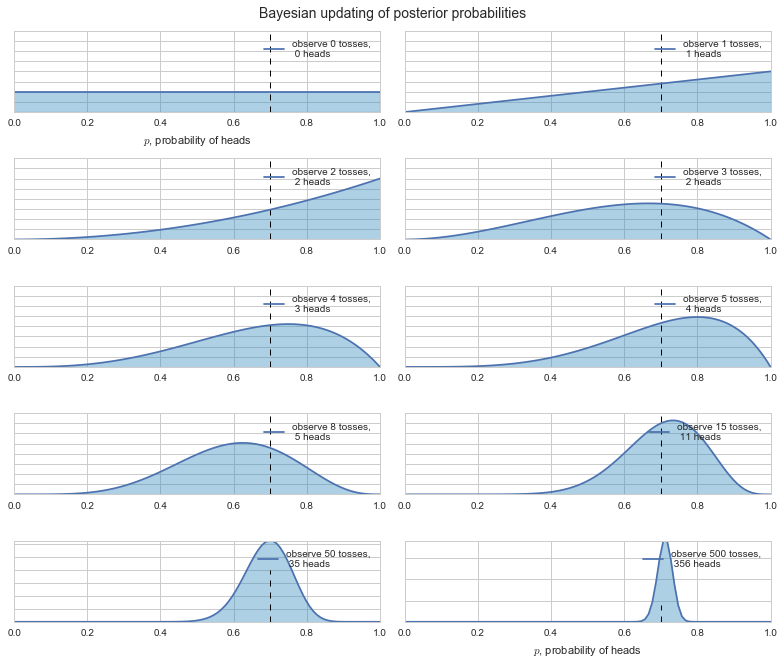

In [18]:
plt.figure(figsize=(11, 9))

p2=0.7
data = make_data(p2, n_trials)
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution.
    y = beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(p2, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Because we are not trumplandians, our prior might be that the earth has more water in a  2 to 1 ratio. This is where the Beta comes in useful, as it has an iterpretation in terms of "prior" heads and "prior" tails (here 2 and 1 respectively). This allows us to nudge our machine in low data situations.

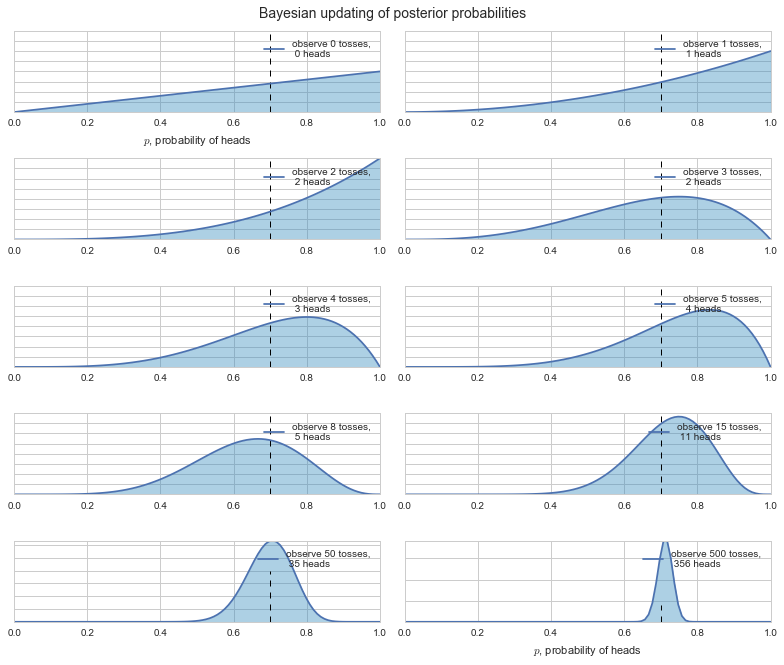

In [19]:
plt.figure(figsize=(11, 9))

x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution. note changed prior
    y = beta.pdf(x, 2 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(p2, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Notice that for low data the posteriors are somewhat shifted. You can also see that for large amounts of data the prior gets washed out.

### The posterior predictive

At the end of the day we want to make predictions, here for the number of coin tosses  (or globe throws) that come up heads (or water). This is given us by the postrior predictive, which is the average of the likelihood at the points where the data is wanted with the posterior.

The entire process is illustrated in this diagram, where the beta-posterior, is multiplied by another binomial likelihood, one at each point $y$ (number of samples), and then integrated over the parameters (here just p).


![](images/postpred.png)

## The Normal Model

 
 A random variable $Y$ is normally distributed with mean $\mu$ and variance $\sigma^2$. Thus its density is given by :
 
 $$ p(y \vert \mu, \sigma^2) =  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{y-\mu}{2 \sigma})^2} $$
 
 
Suppose our model is $\{y_1, \ldots, y_n \vert \mu, \sigma^2 \} \sim N(\mu, \sigma^2)$ then
the likelihood is 

$$
p(y_1, \ldots, y_n \vert \mu, \sigma^2) = 
\prod_{i=1}^{n} p(y_i \vert \mu, \sigma^2)=\prod_{i=1}^{n}  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{(y_i-\mu)^2}{2\sigma^2})} = 
\frac{1}{ \sqrt{ 2 \pi \sigma^2}}   \exp \left\{  - \frac{1}{2}  \sum_i \frac{(y_i-\mu)^2}{\sigma^2} \right\} 
$$

We can now write the posterior for this model thus:

$$ p( \mu, \sigma^2 \vert  y_1, \ldots, y_n, \sigma^2)  \propto \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{ - \frac{1}{2\sigma^2} \sum (y_i - \mu)^2 } \, p(\mu, \sigma^2)$$

Lets see the posterior of $\mu$ assuming we 
know $\sigma^2$.  

### Normal Model for fixed $\sigma$

Now we wish to condition on a known $\sigma^2$. The prior probability distribution for it can then be written as:

$$p(\sigma^2) = \delta(\sigma^2 -\sigma_0^2)$$

(which does integrate to 1).

Now, keeping in mind that $p(\mu, \sigma^2) = p(\mu \vert \sigma^2) p(\sigma^2)$ and carrying out the integral over $\sigma^2$ which because of the delta distribution means that we must just substitute $\sigma_0^2$ in, we get:

$$ p( \mu \vert  y_1, \ldots, y_n, \sigma^2 = \sigma_0^2)  \propto p(\mu \vert \sigma^2=\sigma_0^2) \,e^{ - \frac{1}{2\sigma_0^2} \sum (y_i - \mu)^2 }$$

where I have dropped the $\frac{1}{\sqrt{2\pi\sigma_0^2}}$ factor as there is no stochasticity in it (its fixed).

The conjugate of the normal is the normal itself. 

Say we have the prior

$$ p(\mu \vert \sigma^2) = \exp \left\{ -\frac{1}{2 \tau^2} (\hat{\mu}-\mu)^2 \right\} $$

then it can be shown that the posterior is 

$$  p( \mu \vert  y_1, \ldots, y_n, \sigma^2) \propto \exp \left\{ -\frac{a}{2} (\mu-b/a)^2 \right\} $$
where 
$$ a = \frac{1}{\tau^2} + \frac{n}{\sigma_0^2} , \;\;\;\;\; b = \frac{\hat{\mu}}{\tau^2} + \frac{\sum y_i}{\sigma_0^2} $$
This is a normal density curve with $1/\sqrt{a}$ playing the role of the 
standard deviation and $b/a$ playing the role of the mean. Re-writing this, 

$$ p( \mu \vert  y_1, \ldots, y_n, \sigma^2)  \propto \exp\left\{ -\frac{1}{2} \left( \frac{\mu-b/a}{1/\sqrt(a)}\right)^2 \right\} $$


Define $\kappa = \sigma^2 / \tau^2 $ to be the variance of the sample model  in units of variance
of our prior belief (prior distribution) then the *posterior mean* is 

$$\mu_p = \frac{b}{a} = \frac{ \kappa}{\kappa + n }  \hat{\mu} + \frac{n}{\kappa + n} \bar{y} $$

which is a weighted average of prior mean and sampling mean.
The variance is 

$$ \tau_p^2 = \frac{1}{1/\tau^2+n/\sigma^2} $$
or better 

$$ \frac{1}{\tau_p^2} = \frac{1}{\tau^2} + \frac{n}{\sigma^2}. $$

You can see that as $n$ increases, the data dominates the prior and the posterior mean approaches the data mean, with the posterior distribution narrowing...

## Example of the normal model for fixed $\sigma$

We have data on the wing length in millimeters of a nine members of a particular species of moth. We wish to make inferences from those measurements on the population mean $\mu$. Other studies show the wing length to be around 19 mm. We also know that the length must be positive. We can choose a prior that is normal and most of the density is above zero ($\mu=19.5,\tau=10$). This is only a **marginally informative** prior.

Many bayesians would prefer you choose relatively uninformative priors.

The measurements were: 16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8 giving $\bar{y}=18.14$. 

In [5]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)
n = len(Y)
print("sigma", sig, "mu", mu_data, "n", n)

sigma 1.33092374864 mu 18.1444444444 n 9


In [9]:
# Prior mean
mu_prior = 19.5
# prior std
tau = 10 

In [10]:
kappa = sig**2 / tau**2
sig_post =np.sqrt(1./( 1./tau**2 + n/sig**2));
# posterior mean
mu_post = kappa / (kappa + n) *mu_prior + n/(kappa+n)* mu_data
print("mu post", mu_post, "sig_post", sig_post)

mu post 18.1471071751 sig_post 0.443205311006


In [11]:
#samples
N = 15000
theta_prior = np.random.normal(loc=mu_prior, scale=tau, size=N);
theta_post = np.random.normal(loc=mu_post, scale=sig_post, size=N);

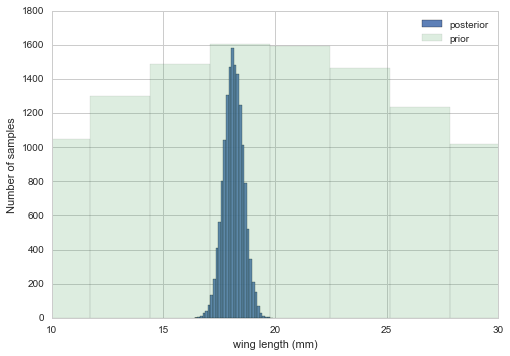

In [12]:
plt.hist(theta_post, bins=30, alpha=0.9, label="posterior");
plt.hist(theta_prior, bins=30, alpha=0.2, label="prior");
plt.xlim([10, 30])
plt.xlabel("wing length (mm)")
plt.ylabel("Number of samples")
plt.legend();